
# Project: Twitter WeRateDogs

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#1.0 DATA WRANGLING">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1.0 Introduction

### General

> WeRateDogs (dog rates) is a Twitter account that rates people's dogs by leaving a humorous comment about the dog; My goal is to wrangle its archive data from many sources to build a clean tidy dataframe, and then do data analysis and visualization on the resulting dataframe.

#### Aim and Objectives
>In this project, i will be analysing data from a Twittert account. In particular, I will be interested in finding factors that makes movies get high ratings and how they differ from movies with low ratings. Specifically, I will be looking for trends in what genres, casts, directors, months, are associated with high and low ratings movies and if ratings affect both budget and revenue. I will also be exploring the cast that are involved in popular and non popular movies.


#### Import Packages


## 2.0 DATA WRANGLING

### 2.1 Gathering Data

In [1]:
# import statements for all of the packages that i plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#  expand the output display to see more columns of the DataFrame?
pd.set_option('display.max_colwidth', None)

In [3]:
# Download the twitter_archive_enhanced.csv file on my pc, upload it and read the data into a pandas DataFrame
tweets_df = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
# Download the image_predictions.tsv from " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/
# 599fd2ad_image-predictions/image-predictions.tsv", and load it.
import requests
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [5]:
# Save the file as image_predictions.tsv
with open("image_predictions.tsv", mode="wb") as file:
    file.write(response.content)

In [6]:
# Load the file as image_prediction_df 
image_prediction_df = pd.read_csv("image_predictions.tsv", sep="\t")

In [7]:
# Gather each tweet's retweet count and favorite ("like") count a Using the tweet IDs in the WeRateDogs Twitter archive,
# query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set
# of JSON data in a file called tweet_json.txt file.

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#       print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [9]:
# Load the data saved as 'tweet-json.txt' on the pc as jason
additional_tweets = [json.loads(line) for line in open('tweet-json.txt','r')]

In [10]:
# Convert additional_tweets to DataFrame
additional_tweets = pd.DataFrame(data=additional_tweets)

In [11]:
# Extract id, retweet_count, favorite_count from tweet_count_df and save as count_df
additional_info = additional_tweets.loc[:, ["id", "retweet_count", "favorite_count"]]

###  1.2 Assessing Data

In [12]:
tweets_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [13]:
image_prediction_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
additional_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [15]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
additional_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
# Check for duplicated columns in three data
all_columns = pd.Series(list(tweets_df) + list(image_prediction_df) + list(additional_info))
list(all_columns[all_columns.duplicated()])

['tweet_id']

#### Tweets Data

In [19]:
# Check for duplicated rows in the tweets_df table
tweets_df.duplicated().sum()

0

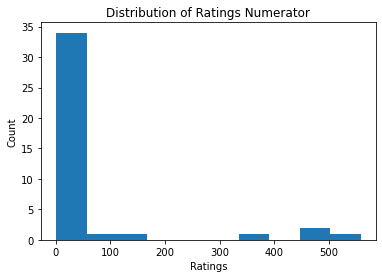

In [20]:
#check the range and frequency of rating_numerator to understand data
tweets_df.rating_numerator.value_counts().plot(kind="hist")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of Ratings Numerator");

In [21]:
tweets_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [22]:
# Check the rating_numerator for values that are not consistent with the rating system their corresponding text column to understand where the problem lies
tweets_df.query("rating_numerator >20 or rating_numerator<=0")[["text", "rating_numerator"]]

,text,rating_numerator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27


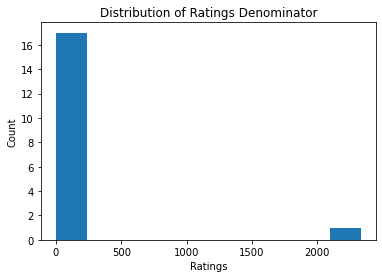

In [23]:
#check the range and frequency of rating_denominator to understand data
tweets_df.rating_denominator.value_counts().plot(kind="hist")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of Ratings Denominator");

In [24]:
tweets_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [25]:
# Check the rating_denominator for values that are not consistent with the rating system their corresponding text column to understand where the problem lies
tweets_df.query("rating_denominator != 10")[["text", "rating_denominator"]]

,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


In [26]:
# Examine the dog names 
tweets_df["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [27]:
# Explore the names with the corresponding text from whic they were extracted
tweets_df[(tweets_df["name"].str[0].str.islower()) | (tweets_df["name"]=="None")][["text", "name"]]

,text,name
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
24,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,None
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,a


In [28]:
# Explore the empty dog stages with thw corresponding text they were extracted from
(
    tweets_df[(tweets_df["doggo"]== "None") & (tweets_df["floofer"] == "None") & 
              (tweets_df["pupper"] == "None") & (tweets_df["puppo"]== "None")][["text","doggo","floofer", "pupper", "puppo"]]
)

,text,doggo,floofer,pupper,puppo
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,None,None,None
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",None,None,None,None
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,None,None,None,None
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,None,None,None,None
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",None,None,None,None
...,...,...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None,None,None,None
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,None,None,None,None
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,None,None,None,None
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,None,None,None,None


#### Image Prediction Data

In [29]:
# Check for duplicates
image_prediction_df.duplicated().sum()

0

#### Additional Tweeet Info

In [30]:
# Check for duplicates
additional_info.duplicated().sum()

0

### Qualty Issues
- Timestamp is a float not timestamp
- Some ratings (rating_numerator and rating_denominator) are wrong
- rating_denominator are of different values instead of the same value (10) to ensure consistency
- Some dog names are wrong
- Some dog stages are wrong
- tweet_id is integer not string
- Some tweets are retweet of another tweet
- Some  image predictions are not dogs

### Tidyness Issues
- One variable in three columns in tweets_df table (doggo, floofer, pupper, puppo)
- Two variables in one column in tweets_df table (date and time)
- tweet_df, count_df and breed_df should be part of the same table
- tweet_id in tweets_df table duplicated in breed_df and count_df table
- id in additional_info table is not consistence with the column name(tweet_id) in the other dataset


## Cleaning Data

In [31]:
#  make a copy for each dataframe.
tweets_dfclean = tweets_df.copy()
image_pediction_dfclean = image_prediction_df.copy()
additional_info_clean = additional_info.copy()

### Tweets DataFrame

##### Tidiness Issue
#####  A. 
##### Define.
     Change the timestamp column in the tweets_dfclean from string to datetime.
    

##### Code

In [32]:
tweets_dfclean["timestamp"] = tweets_dfclean["timestamp"].apply(pd.to_datetime)

##### Test

In [33]:
tweets_dfclean["timestamp"].dtype

datetime64[ns, UTC]

##### B
##### Define
    Rename id to tweet_id in the addition_infoclean dataframe

#### Code

In [34]:
additional_info_clean.rename(columns={"id":"tweet_id"}, inplace=True)

##### Test

In [35]:
additional_info_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### C
#### Define
    Change the tweets_id column to string type in the three datasets

#### Code

In [36]:
tweets_dfclean.tweet_id = tweets_dfclean.tweet_id.astype("string")

#### Test

In [37]:
assert(tweets_dfclean.tweet_id.dtype == "string")

#### D
#### Define
    represent the dog stage in a coincise form 

In [38]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']

In [39]:
# replace none with empty value
for i in stages:
    tweets_dfclean[i] = tweets_dfclean[i].replace("None", "")

In [40]:
# join the 'doggo', 'floofer', 'pupper', 'puppo' columns together to form a new column dog stage
tweets_dfclean["stage"] = tweets_dfclean["doggo"]+tweets_dfclean["floofer"]+tweets_dfclean["pupper"]+tweets_dfclean["puppo"]

In [41]:
# rename dog stages with two different combined stage in an appropriate manner
tweets_dfclean["stage"].replace({"doggopupper":"doggo pupper", "doggopuppo":"doggo puppo", "doggofloofer":"doggo floofer"}, inplace=True)

In [42]:
# replace empty stage names with "not available"
tweets_dfclean["stage"].replace("", "not available", inplace=True)

In [43]:
# drop the 'doggo', 'floofer', 'pupper', 'puppo' columns
tweets_dfclean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [44]:
tweets_dfclean["stage"].value_counts()

not available    1976
pupper            245
doggo              83
puppo              29
doggo pupper       12
floofer             9
doggo puppo         1
doggo floofer       1
Name: stage, dtype: int64

In [45]:
tweets_dfclean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,not available
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,not available


#### E1
#### Define
    Assess the rating_numerator and denominator column for incorrect values and replacing them 
    with the wrong values while droping the ones that don't have the correct values present

#### Code

In [46]:
tweets_dfclean[(tweets_dfclean["rating_numerator"]<0) | (tweets_dfclean["rating_numerator"]>20)][["text", "rating_numerator"]]

,text,rating_numerator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165


In [47]:
tweets_dfclean.loc[313, ["rating_numerator"]]=13
tweets_dfclean.loc[340, ["rating_numerator"]]=9.75
tweets_dfclean.loc[695, ["rating_numerator"]]=9.75
tweets_dfclean.loc[763, ["rating_numerator"]]=11.27
tweets_dfclean.loc[1202, ["rating_numerator"]]=11
tweets_dfclean.loc[1712, ["rating_numerator"]]=11.26

In [48]:
tweets_dfclean = tweets_dfclean[(tweets_dfclean["rating_numerator"]>0) & (tweets_dfclean["rating_numerator"]<20)]

In [49]:
tweets_dfclean.loc[:, ["rating_denominator"]] = 10

In [50]:
print(tweets_dfclean.rating_numerator.value_counts(), tweets_dfclean.rating_denominator.value_counts())

12.00    558
11.00    465
10.00    461
13.00    352
9.00     158
8.00     102
7.00      55
14.00     54
5.00      37
6.00      32
3.00      19
4.00      17
1.00       9
2.00       9
15.00      2
9.75       2
11.27      1
17.00      1
11.26      1
Name: rating_numerator, dtype: int64 10    2335
Name: rating_denominator, dtype: int64


#### E2
#### Define
     Create a new table for ratings = rating_numerator/rating_denominator and drop both rating_numerator and rating_denominator

#### Code

In [51]:
# create a new column "ratings" which is the numerator/denominator
tweets_dfclean["ratings"] = tweets_dfclean["rating_numerator"]/tweets_dfclean["rating_denominator"]

In [52]:
# Drop the rating_denominator, rating_numerator columns
tweets_dfclean.drop(["rating_denominator", "rating_numerator"], axis=1, inplace=True)

#### Test

In [53]:
tweets_dfclean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,ratings
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,not available,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,not available,1.3


#### F
#### Define
     Re-extract the dog names into a new column

#### Code

In [54]:
# Extract names that comes after the following phrases; is, 's, Meet, named, and Start with a capital letter
tweets_dfclean["dog_name"] = tweets_dfclean["text"].str.extract(
        "((?<= [i, ']s )[A-Z][a-z]+| (?<= named )[A-Z][a-z]+| (?<=[M,m]eet )[A-Z][a-z]+| (?<= to )[A-Z][a-z]+)")

In [55]:
# remove white space
tweets_dfclean["dog_name"] = tweets_dfclean["dog_name"].str.strip()

In [56]:
# replace empty values with unavailable
tweets_dfclean["dog_name"].fillna("unavailable", inplace=True)

In [57]:
# Drop the name column
tweets_dfclean.drop("name", axis=1, inplace=True)

#### Test

In [58]:
tweets_dfclean["dog_name"].value_counts()

unavailable    796
Oliver          12
Charlie         12
Cooper          11
Lucy            11
              ... 
Gilbert          1
Zoe              1
Stewie           1
Lilah            1
Netflix          1
Name: dog_name, Length: 958, dtype: int64

In [59]:
tweets_dfclean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,stage,ratings,dog_name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,not available,1.3,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,not available,1.3,Tilly


#### G
#### Define
    Extract from which device or mode the tweet was made from the source column

In [60]:
# the decvice or mode follow the same format; they start with > and ends with < 
tweets_dfclean["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2201
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [61]:
# Create a new column for the extracted info
tweets_dfclean["source_device"]= tweets_dfclean.source.str.extract((r"(?<=>)(.*)(?=<)"))

In [62]:
tweets_dfclean["source_device"].replace({"Twitter for iPhone":"Iphone", "Vine - Make a Scene": "Vine", "Twitter Web Client": "Tweeter Web"}, inplace=True)

In [63]:
# Drip the source column
tweets_dfclean.drop("source", axis=1, inplace=True)

#### Test

In [64]:
tweets_dfclean["source_device"].value_counts()

Iphone         2201
Vine             91
Tweeter Web      33
TweetDeck        10
Name: source_device, dtype: int64

In [65]:
tweets_dfclean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,stage,ratings,dog_name,source_device
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,not available,1.3,Phineas,Iphone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,not available,1.3,Tilly,Iphone


#### H
#### Define
Remove tweets that are retweeted i.e not original tweets

#### Code

In [66]:
# original tweets have null values in retweeted_status_id column
tweets_dfclean = tweets_dfclean[tweets_dfclean["retweeted_status_id"].isnull()]

In [67]:
# original tweets have null values in in_reply_to_status_id column
tweets_dfclean = tweets_dfclean[tweets_dfclean["in_reply_to_status_id"].isnull()]

#### Test

In [68]:
tweets_dfclean["retweeted_status_id"].notnull().any()

False

In [69]:
tweets_dfclean["retweeted_status_timestamp"].notnull().any()

False

#### I
#### Define
    Drop unused and unneccessary columns

#### Code

In [70]:
columns = ["retweeted_status_timestamp","retweeted_status_id","in_reply_to_status_id", 
           "expanded_urls", "text", "in_reply_to_user_id", "retweeted_status_user_id"]


In [71]:
# Drop "retweeted_status_timestamp","retweeted_status_id","in_reply_to_status_id",
# "expanded_urls", "text", "in_reply_to_user_id" and "retweeted_status_user_id" columns
tweets_dfclean.drop(columns, axis=1, inplace=True)

#### Test

In [72]:
tweets_dfclean.columns

Index(['tweet_id', 'timestamp', 'stage', 'ratings', 'dog_name',
       'source_device'],
      dtype='object')

In [73]:
tweets_dfclean.head(2)

,tweet_id,timestamp,stage,ratings,dog_name,source_device
0,892420643555336193,2017-08-01 16:23:56+00:00,not available,1.3,Phineas,Iphone
1,892177421306343426,2017-08-01 00:17:27+00:00,not available,1.3,Tilly,Iphone


### image_prediction Data Frame 

#### J
#### Define
    Change tweet_id to string data type

#### Code

In [74]:
image_pediction_dfclean["tweet_id"] = image_pediction_dfclean["tweet_id"].astype("string")

#### Test

In [75]:
assert image_pediction_dfclean["tweet_id"].dtype =="string"

#### K 
#### Define
    Create a new table wit the highest prediction and corresponding dog breed and droping predictions that aren't dogs

In [76]:
# Predictions that are not dog
image_pediction_dfclean[(image_pediction_dfclean["p1_dog"]==False) & (image_pediction_dfclean["p2_dog"]==False) 
                              & (image_pediction_dfclean["p3_dog"]==False)].shape

(324, 12)

In [77]:
# Droping predictions that are not dog
image_pediction_dfclean = image_pediction_dfclean[(image_pediction_dfclean["p1_dog"]==True) | (image_pediction_dfclean["p2_dog"]==True) 
                              | (image_pediction_dfclean["p3_dog"]==True)]

In [78]:
# extract the most likely prediction which is a dog
# Input: Columns(p1_dog, p1/p1_conf, p2_dog, p2/p2_conf, p3_conf)
# output: Results after checking the true/false of the p1_dog and p2_dog columns
def get_attr(x):
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]

In [79]:
# Create new columns for the breed with the highest prediction among the dog breeds predicted and the corresponding confidence
image_pediction_dfclean["breed"] =  image_pediction_dfclean[["p1_dog", "p1", "p2_dog","p2", "p3"]].apply(get_attr, axis = 1)
image_pediction_dfclean["confidence"] = image_pediction_dfclean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [80]:
# Remove underscrore and hiphen from the breed name
image_pediction_dfclean["breed"]= image_pediction_dfclean["breed"].str.replace("_"," ")

In [81]:
image_pediction_dfclean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed', 'confidence'],
      dtype='object')

In [82]:
# drop unneccessary columns and save the new data as dogbreed_df
dogbreed_df = image_pediction_dfclean.iloc[:, [0, -2, -1]]

#### Test

In [83]:
dogbreed_df.head(2)

,tweet_id,breed,confidence
0,666020888022790149,Welsh springer spaniel,0.465074
1,666029285002620928,redbone,0.506826


In [84]:
dogbreed_df.duplicated().any()

False

In [85]:
dogbreed_df.isnull().any()

tweet_id      False
breed         False
confidence    False
dtype: bool

### addadditional_info_clean Table

#### L
   #### Define
   > Change tweet_id to string data type

#### Code

In [86]:
additional_info_clean["tweet_id"] = additional_info_clean["tweet_id"].astype("string")

#### Test

In [87]:
assert additional_info_clean["tweet_id"].dtype=="string"

### All Tables

#### M
#### Define
>merge the tweets_dfclean with dogbreed_df and additional_info_clean dataframe

#### Test

In [88]:
tweetsbreedinfo_df= pd.merge(tweets_dfclean, dogbreed_df, on="tweet_id")

In [89]:
overalltweetsinfo_df = pd.merge(tweetsbreedinfo_df, additional_info_clean, on="tweet_id")

#### Test

In [90]:
overalltweetsinfo_df.head()

,tweet_id,timestamp,stage,ratings,dog_name,source_device,breed,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,not available,1.3,Tilly,Iphone,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,not available,1.2,Archie,Iphone,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,not available,1.3,Darla,Iphone,Labrador retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,not available,1.2,Franklin,Iphone,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,not available,1.3,unavailable,Iphone,Chesapeake Bay retriever,0.425595,3261,20562


In [91]:
overalltweetsinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 1653
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1654 non-null   string             
 1   timestamp       1654 non-null   datetime64[ns, UTC]
 2   stage           1654 non-null   object             
 3   ratings         1654 non-null   float64            
 4   dog_name        1654 non-null   object             
 5   source_device   1654 non-null   object             
 6   breed           1654 non-null   object             
 7   confidence      1654 non-null   float64            
 8   retweet_count   1654 non-null   int64              
 9   favorite_count  1654 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(4), string(1)
memory usage: 142.1+ KB


## Storing Data

In [92]:
# Save overalltweetsinfo_df as twitter_archive_master.csv
overalltweetsinfo_df.to_csv("twitter_archive_master.csv", index=False)

### Opening and asseccing the saved file

In [93]:
df = pd.read_csv("twitter_archive_master.csv")

In [94]:
df.head()

,tweet_id,timestamp,stage,ratings,dog_name,source_device,breed,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,not available,1.3,Tilly,Iphone,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,not available,1.2,Archie,Iphone,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,not available,1.3,Darla,Iphone,Labrador retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,not available,1.2,Franklin,Iphone,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,not available,1.3,unavailable,Iphone,Chesapeake Bay retriever,0.425595,3261,20562


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1654 non-null   int64  
 1   timestamp       1654 non-null   object 
 2   stage           1654 non-null   object 
 3   ratings         1654 non-null   float64
 4   dog_name        1654 non-null   object 
 5   source_device   1654 non-null   object 
 6   breed           1654 non-null   object 
 7   confidence      1654 non-null   float64
 8   retweet_count   1654 non-null   int64  
 9   favorite_count  1654 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 129.3+ KB


#### N
#### Define
>tweet_id and timestamp data types have been affected by the storing change them back to string and datetime repectively

#### Code

In [96]:
df.columns

Index(['tweet_id', 'timestamp', 'stage', 'ratings', 'dog_name',
       'source_device', 'breed', 'confidence', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [97]:
# change tweet_id and timestamp dtype to string and datetime repectively
df["tweet_id"] = df["tweet_id"].astype("string")

In [98]:
df.timestamp = df.timestamp.apply(pd.to_datetime)

#### Test

In [99]:
assert df.timestamp.dtype=="datetime64[ns, UTC]"
assert df.tweet_id.dtype=="string"

In [109]:
df.corr()

,ratings,confidence,retweet_count,favorite_count
ratings,1.000000,0.142305,0.317691,0.429296
confidence,0.142305,1.000000,0.027709,0.063809
retweet_count,0.317691,0.027709,1.000000,0.913581
favorite_count,0.429296,0.063809,0.913581,1.000000


In [110]:
X=df[["retweet_count"]]
y=df["favorite_count"]

In [114]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lr = LinearRegression()

In [119]:
lr.fit(X,y)

LinearRegression()

In [121]:
X_test= additional_info_clean[["retweet_count"]]

In [131]:
favorite_count = lr.predict(X)

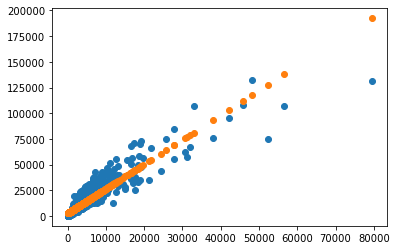

In [132]:
plt.scatter(X, y)
plt.scatter(X, favorite_count)

In [133]:
from sklearn.metrics import mean_absolute_error

In [134]:
mean_absolute_error(favorite_count, y)

3237.5521216248626

In [135]:
print(lr.coef_)
print(lr.intercept_)

[2.38838985]
2520.633221061943


## Data Analysis and Visualization

### Which dog breed has the highest ratings

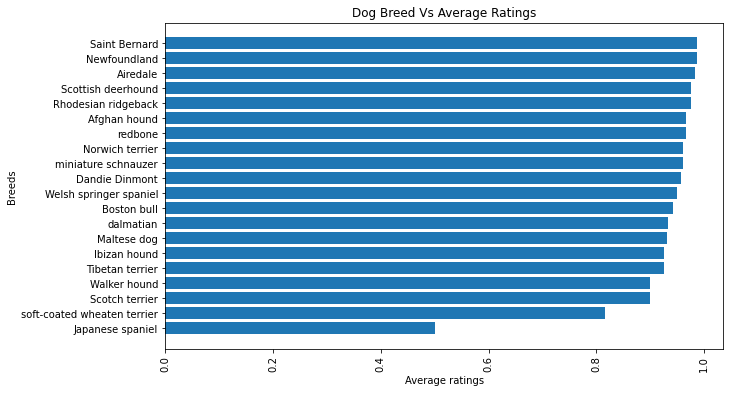

In [100]:
fig = plt.figure(figsize=(10,6))
df_toprated_breed = df.groupby("breed")["ratings"].mean().sort_values(ascending=True)[:20]
plt.barh(df_toprated_breed.index, df_toprated_breed)
plt.ylabel("Breeds")
plt.xlabel("Average ratings")
plt.xticks(rotation=90)
plt.title("Dog Breed Vs Average Ratings");

### Which dog breed has the highest favourite counts

Text(0.5, 1.0, 'Dog Breed Vs Average Retweet Count')

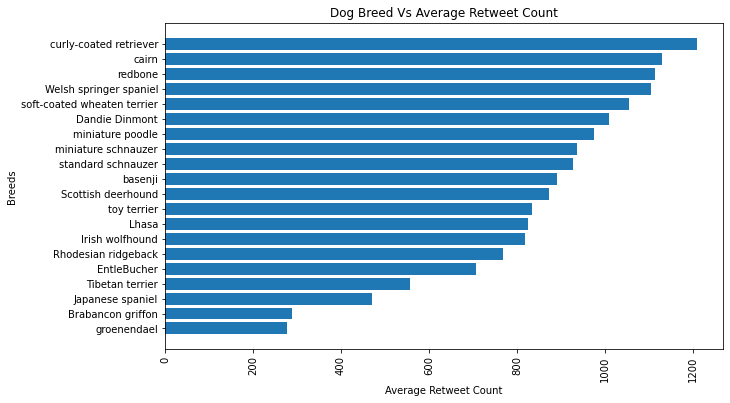

In [101]:
fig = plt.figure(figsize=(10,6))
df_retweeted_breed = df.groupby("breed")["retweet_count"].mean("retweet_count").sort_values(ascending=True)[:20]
plt.barh(df_retweeted_breed.index, df_retweeted_breed)
plt.ylabel("Breeds")
plt.xlabel("Average Retweet Count")
plt.xticks(rotation=90)
plt.title("Dog Breed Vs Average Retweet Count")

### Which dog breed has the highest favorite counts

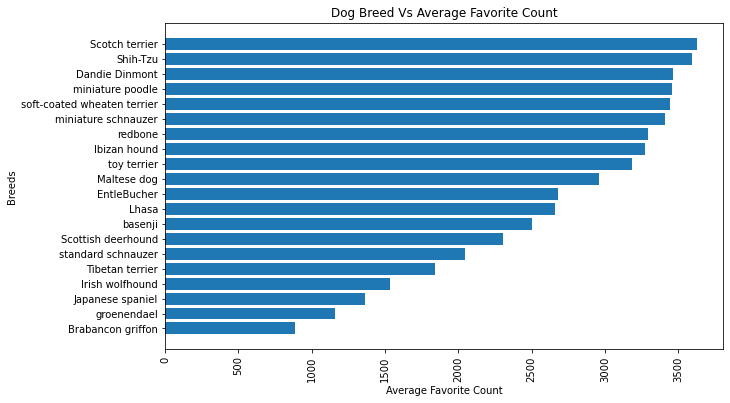

In [102]:
fig = plt.figure(figsize=(10,6))
df_favorite_breed = df.groupby("breed")["favorite_count"].mean("favorite_count").sort_values(ascending=True)[:20]
plt.barh(df_favorite_breed.index, df_favorite_breed)
plt.ylabel("Breeds")
plt.xlabel("Average Favorite Count")
plt.xticks(rotation=90)
plt.title("Dog Breed Vs Average Favorite Count");

### What's the relationship between ratings and favorite count

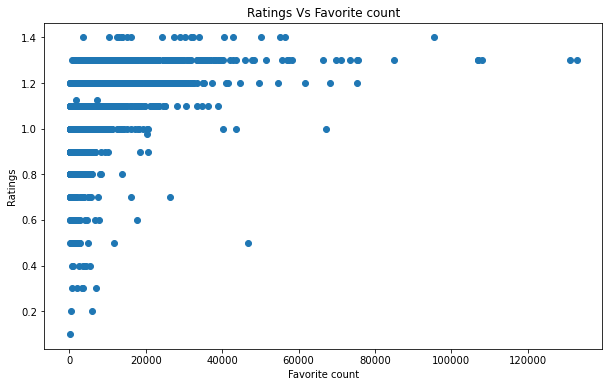

In [103]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df.favorite_count, df.ratings)
plt.xlabel("Favorite count")
plt.ylabel("Ratings")
plt.title("Ratings Vs Favorite count");

### What's the relationship between ratings and retweet count

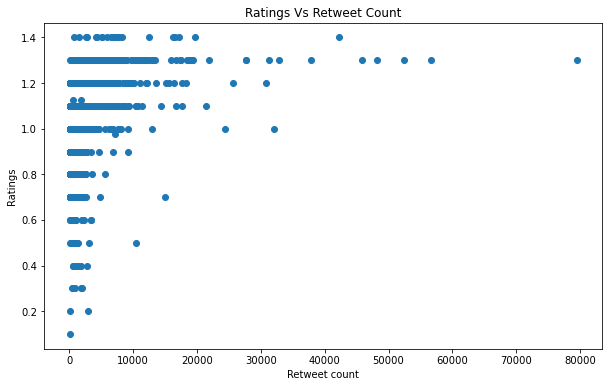

In [104]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df.retweet_count, df.ratings)
plt.xlabel("Retweet count")
plt.ylabel("Ratings")
plt.title("Ratings Vs Retweet Count");

### The relationship between retweet count and favorite count

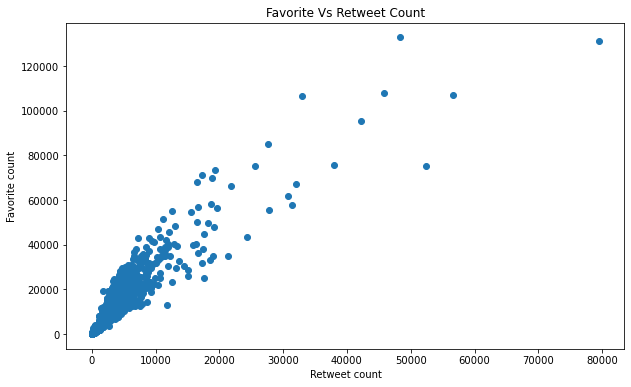

In [105]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df.retweet_count, df.favorite_count)
plt.xlabel("Retweet count")
plt.ylabel("Favorite count")
plt.title("Favorite Vs Retweet Count");

### The popular breeds

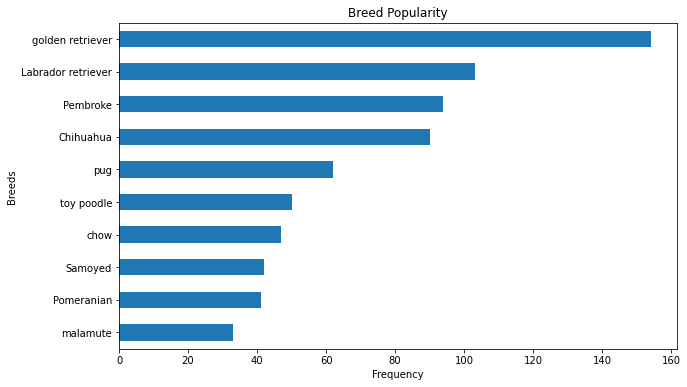

In [106]:
df.breed.value_counts()[:10].sort_values(ascending=True).plot(figsize=(10,6), kind="barh")
plt.xlabel("Frequency")
plt.ylabel("Breeds")
plt.title("Breed Popularity");

### Dog Stage with the most ratings

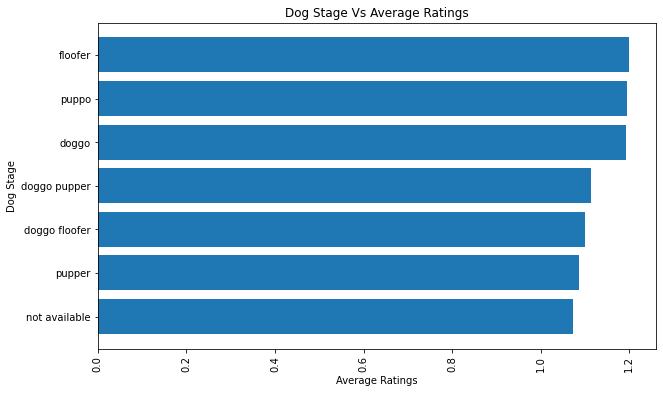

In [107]:
fig = plt.figure(figsize=(10,6))
df_toprated_stage = df.groupby("stage")["ratings"].mean().sort_values(ascending=True)[:7]
plt.barh(df_toprated_stage.index, df_toprated_stage)
plt.title("Dog Stage Vs Average Ratings")
plt.ylabel("Dog Stage")
plt.xlabel("Average Ratings")
plt.xticks(rotation=90)
plt.show();

### Tweets Sources

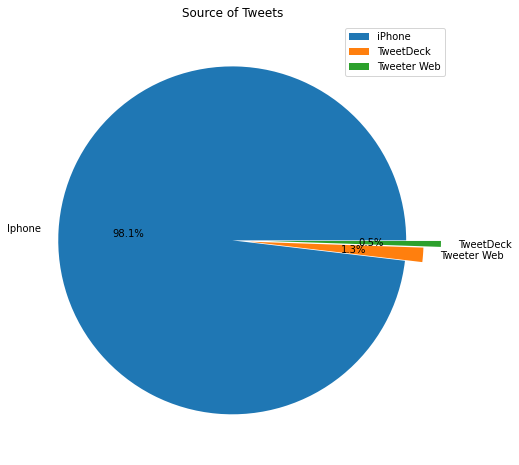

In [108]:
fig = plt.figure(figsize=(10,6))
tweet_source = df.source_device.value_counts()
# Find the percentage of each source
tweet_source["percentage"] = tweet_source/tweet_source.sum()*100
# Plot a pie chat for the percentage 
tweet_source["percentage"].plot.pie(figsize=(10,8), autopct='%1.1f%%',
        explode=(0,0.1,0.2))
plt.title("Source of Tweets")
plt.legend([ "iPhone", "TweetDeck", "Tweeter Web"])
plt.ylabel("");

<a id='conclusions'></a>
## Conclusions
1. Higher ratings were observed among Saint Bernard, Newfoundland, Airedale and Scottish Deehound.

2. Curly Coated Retriever, Calm, Red Bone, Welsh Springer Spaniel and Soft Coated Wheaten Terrier are the dog breeds that have the highest number of retweets.

3. Scotch terrier, Shih Tzu, Dandle Dinmont, Miniature Poodle and Soft Coated Wheaten Terrier are the dog breeds that have the highest number of Likes or favorite counts.

4. There isn’t a general relationship between ratings and like count since dogs with both low and high favorite count have higher ratings. However, dogs with high favorite counts are observed to get higher ratings. 

5. Just like the relationship observed between Ratings and Favorite Count, there isn’t a general relationship between ratings and retweet count since dogs with both low and high retweet count have higher ratings. However, dogs with high retweet are observed to get higher ratings. 

6. A sort of linear relationship existed between likes and retweet, the more a dog is like, the more the image is retweeted, 

7. Majority of the dogs that were rated are Golden Retrievers, followed by Labrador Retriever, Pembroke, Chihuahua and Pug in that order. 

8. Dogs that are classified as both duggo and puppo were rated highest followed by floofers, puppo, doggo, doggo and pupper, doggo and floofer in that order. Of the 7 stages categories, Pupper received the least ratings. 

9. Majority of the tweets were made from a mobile iphones followed by web and tweetdeck



## Limitations

1. Several tweets with incoherent ratings and whose image predictions weren’t  dogs were dropped during the data cleaning process, while it is important to drop these tweets for consistency and correctness, it likely will affect the overall result of the analysis.
